# Практическая работа №0: Статистический анализ социальных сетей.
Выполнил студент гр. 0381 Ибатов Николай. Вариант №5

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** - элемент сети, представляющий собой пару акторов и (возможную) связь между ними:
$${D_{ij} = (X_{ij},X_{ji}), i \neq j}$$

**Цензус диад** $-$ тройка чисел $M A N$ где:
$${M = \sum_{i<j} X_{ij} X_{ji}}$$
$${A = X_{++} - 2M}$$
$${N = C^2_g - A - M}$$
    
   **Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 
   
$$-\infty < \rho_{кр} \leqslant 1$$.

* Если $\rho_{кр} = 0$ то акторы не имеют склонности взаимно выбирать друг друга.

* Если $\rho_{кр} = 1$ то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

* Если $\rho_{кр} < 0$ то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад предполагая что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

*Для фиксированного выбора из $d$ акторов:*

* По методу моментов оценка 
$$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$$.

* Вероятность того что связь будет взаимной для двух акторов:

$$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$$

*Для свободного выбора:*

* По методу моментов оценка 
$$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$$.

* Вероятность того что связь будет взаимной для двух акторов (для каждого из акторов):

$$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$$

**Индекс взаимности Бандиопадхьяйя** $-$ индекс основанный на максимальной и минимальной значениях количества диад в сети. 

$$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}$$

где $$M_{\min} = \max f(t) 0 \leqslant t \leqslant g$$

$$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor 0 \leqslant t \leqslant g$$

$$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g$$

$$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \\min (t x_{i+}).$$

**Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$$

Доверительный интервал: 
$$\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$$.

$$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$$

$$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$ где $\alpha - $ некоторый уровень значимости $(1 - \alpha) - $ доверительная надёжность.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [28]:
library(igraph)

Warning message:
"пакет ''statnet'' сейчас используется и не будет установлен"


**1.** С помощью библиотеки igraph смоделировать случайный орграф $\cal G_𝑑$ на основе модели Эрдеша—Реньи: $\cal G_𝑑$ = $\cal G$ (𝑔, 𝑝), где 𝑔 –количество акторов, 𝑝 – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

In [33]:
g <- 78
p <- 0.63
graph <- erdos.renyi.game(g,p, "gnp",directed=TRUE)
graph

IGRAPH abb601e D--- 78 3725 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from abb601e:
 [1]  1->78  2-> 1  4-> 1  5-> 1  7-> 1 10-> 1 11-> 1 13-> 1 14-> 1 15-> 1
[11] 18-> 1 19-> 1 21-> 1 23-> 1 26-> 1 27-> 1 28-> 1 30-> 1 32-> 1 33-> 1
[21] 34-> 1 36-> 1 37-> 1 38-> 1 39-> 1 42-> 1 43-> 1 44-> 1 48-> 1 49-> 1
[31] 50-> 1 53-> 1 54-> 1 55-> 1 56-> 1 57-> 1 58-> 1 59-> 1 60-> 1 62-> 1
[41] 63-> 1 64-> 1 67-> 1 68-> 1 69-> 1 70-> 1 71-> 1 72-> 1 74-> 1 75-> 1
[51] 76-> 1 77-> 1 78-> 1  2->78  3-> 2  4-> 2  7-> 2  8-> 2 10-> 2 11-> 2
[61] 12-> 2 14-> 2 15-> 2 16-> 2 18-> 2 20-> 2 21-> 2 22-> 2 23-> 2 25-> 2
[71] 27-> 2 30-> 2 31-> 2 33-> 2 34-> 2 35-> 2 38-> 2 40-> 2 41-> 2 43-> 2
+ ... omitted several edges

**2.** Отобразить полученный орграф

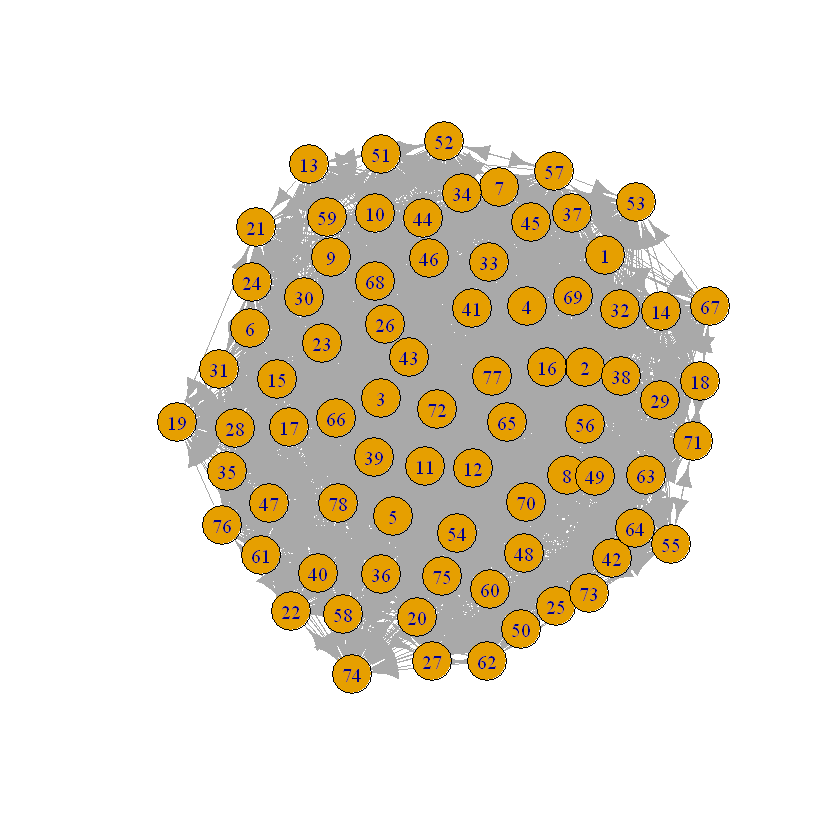

In [34]:
plot(graph, layout=layout.fruchterman.reingold)

**3.** Вычислить «пятичисловую сводку» для графа $\cal G_𝑑$.

In [35]:
cat("Размер сети: ", network.size(net), "\n")
cat("Плотность сети: ", gden(net), "\n")
cat("Число компонент: ", components(net), "\n")
cat("Диаметр сети: ", diameter(graph), "\n")
cat("Коэффициент кластеризации: ", gtrans(net, mode = "graph"), "\n")

Размер сети:  78 
Плотность сети:  0.6308691 
Число компонент:  1 
Диаметр сети:  2 
Коэффициент кластеризации:  0.630142 


**4.** Вычислить цензус диад. Сделать выводы.

In [36]:
cen <- dyad_census(graph)
cen

$mut
[1] 1161

$asym
[1] 1403

$null
[1] 439

*Вывод:*

* Число взаимных диад (mut) = 1161
* Число ассиметричных (asym) = 1403 
* Число нулевых (null) = 439


**5**. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [40]:
# Пусть d = 35 ; (g-1) = 77
d <- 35
m <-cen$mut
rho1 <- (2*(g-1)*m - g * d^2)/(g*d*(g - 1 - d))
rho1

#свободный
matrix <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(matrix))
L2 <- sum(rowSums(matrix)^2)

rho2 <- (2*(g - 1)^2 * cen$mut - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2)
rho2

[1] 0.7260073

[1] 0.00843849

Вывод: при фиксированном выборе, акторы больше образуют взаимные связи, так когда при свободном они образуют одностороннии или не образуют вообще.

**6.** Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [42]:
#фиксированный
rkp <- (d / (g-1)) * ((d/(g-1)) + rho*(g - 1 - d) / (g - 1))
rkp

#свободный
rkp_ <- (rowSums(matrix) * colSums(matrix))/(g - 1)^2
rkp_

rkp_avg <- sum(rkp_)/g
rkp_avg

[1] 0.3866134

[1] 0.4385225 0.3724068 0.4111992 0.4558948 0.4545455 0.3870805 0.3825266
 [8] 0.3643110 0.3388430 0.3956822 0.4386912 0.4614606 0.3471074 0.3636364
[15] 0.3956822 0.3339518 0.3643110 0.3238320 0.3191095 0.3801653 0.3719008
[22] 0.3288919 0.4371732 0.3562152 0.4214876 0.4371732 0.3724068 0.3076404
[29] 0.3373250 0.3336144 0.3801653 0.4300894 0.4648339 0.3870805 0.3801653
[36] 0.3843819 0.4300894 0.4359926 0.4916512 0.3400236 0.3118570 0.3388430
[43] 0.4999157 0.3724068 0.3487941 0.3725755 0.3754427 0.3879238 0.4280654
[50] 0.4049587 0.3710575 0.3388430 0.3180975 0.3725755 0.3612751 0.4201383
[57] 0.3710575 0.3491314 0.3683589 0.3794906 0.3487941 0.3408669 0.4132231
[64] 0.3884298 0.4371732 0.4560634 0.2691854 0.4209816 0.3946703 0.4638219
[71] 0.3553719 0.4047900 0.3567212 0.2973520 0.4280654 0.3646483 0.4128858
[78] 0.4111992

[1] 0.3847732

**7.** Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [44]:
g_func <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    min_sum <- 0   
    for (i in (t+1):g) {
        min_sum <- min_sum + min(c(t, row_sum[i]))
    }
    res <- xi_sum - t*(t-1) - min_sum
    return(res)
}

f_func <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    combination <- factorial(t)/(factorial(2) * factorial(t-2))
    res <- xi_sum - t*(g-1) - combination 
    return(res)
}

row_sum <- rowSums(matrix)

g_res <- rep(2, g - 1)
for (t in 2:(g-1)) {
    g_res[t] <- g_func(row_sum, g, t)
}

f_res <- rep(2, g)
for (t in 2:g) {
    f_res[t] <- f_func(row_sum, g, t)
}

M_max <- floor(0.5 * sum(row_sum[1:g]) - max(g_res))
M_min <- max(f_res)

Bandio <- (cen$mut - M_min)/(M_max - M_min)
Bandio

[1] 0.623789

Вывод: значение очень схоже с **p** = 0.63

**8.** Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе $\cal G_𝑑$ имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.


In [45]:
alpha <- 0.03
l <- sum(matrix)
binom.test(l, g*(g-1), 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 3725, number of trials = 6006, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6077996 0.6325098
sample estimates:
probability of success 
             0.6202131 


**9.** Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе $\cal G_𝑑$ имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), $𝑃_0$) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [46]:
P0 <- 0.69
binom.test(l, g*(g-1), P0)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 3725, number of trials = 6006, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.69
95 percent confidence interval:
 0.6077996 0.6325098
sample estimates:
probability of success 
             0.6202131 


**10.** Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [49]:
p.est <- (sum(matrix))/(g*(g-1))
p.est

lap <- 0.5 - (alpha/2)
lap

z.alpha_2 <- 2.34 # из таблицы


left <- p.est - z.alpha_2 * sqrt((p.est * (1 - p.est))/(g * (g - 1)))
right <- p.est + z.alpha_2 * sqrt((p.est * (1 - p.est))/(g * (g - 1))) 
left
right

[1] 0.6202131

[1] 0.485

[1] 0.6055589

[1] 0.6348674

*Доверительный интервал 0.61 <= **p** <= 0.64* Так как p = 0.63, то доверительный интервал посчитан верно с доверитеоьной надежностью (1 − 𝛼)

## Выводы

В ходе данной практической работы провели анализ случайно сгенерированного ориентированного графа с использованием библиотеки igraph. Проверена корректность посчитанных значений. Сложностью данной работы было то, что некоторые функции (индекс взаимности Бандиопадхьяйя), не реализованы в библиотеке.